# Naver blog scrap

## 라이브러리

In [196]:
import pandas as pd
import time, os
from datetime import datetime
from numpy import nan

In [197]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import chromedriver_autoinstaller as ca

## 현재 파일 위치 확인

In [12]:
# 현재 파일 위치 확인
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/incheon'

## 수집한 파일 저장 폴더 생성

In [13]:
# 수집한 파일을 저장할 폴더 생성
crawled_folder_path = code_path + '/crawled_data/naver_blog'
os.makedirs(crawled_folder_path, exist_ok=True)

## 크롬 드라이버 버전 확인 및 설치

In [14]:
# 크롬 드라이버 버전 확인
chrome_ver = ca.get_chrome_version().split('.')[0]
chrome_ver

'100'

In [217]:
# 크롬 드라이버 설치 확인
try:
    driver = webdriver.Chrome(code_path + f'/{chrome_ver}/' + 'chromedriver.exe')
except:
    ca.install(True)
    driver = webdriver.Chrome(code_path + f'/{chrome_ver}/' + 'chromedriver.exe')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5300/3261653714.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(code_path + f'/{chrome_ver}/' + 'chromedriver.exe')


## 페이지 접속

In [218]:
# 페이지 접속
url = 'https://blog.naver.com/PostView.naver?blogId=icouncil103&logNo=222657505998&categoryNo=9&parentCategoryNo=9&from=thumbnailList'
driver.get(url)
driver.implicitly_wait(3)
driver.maximize_window()

In [237]:
# page 정보
page_info = url.split('=')[2].split('&')[0]
page_info

'222657505998'

## 페이지 스크래핑

### 댓글 버튼 클릭

In [219]:
# 댓글 버튼 클릭
comment_button = driver.find_element_by_xpath('//*[@id="Comi222657505998"]')
comment_button.click()
time.sleep(1)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5300/967029926.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  comment_button = driver.find_element_by_xpath('//*[@id="Comi222657505998"]')


### 페이지 이동 버튼 수집

In [232]:
len(driver.find_elements_by_css_selector('a.u_cbox_pre'))

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5300/2431901800.py:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  len(driver.find_elements_by_css_selector('a.u_cbox_pre'))


2

In [238]:
driver.find_element_by_css_selector(f'#naverComment_201_{page_info} > div > div.u_cbox_paginate > div > a:nth-child(2)').text

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5300/2501731242.py:1: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector(f'#naverComment_201_{page_info} > div > div.u_cbox_paginate > div > a:nth-child(2)').text


'이전\n페이지 목록으로 이동하기'

In [241]:
page_buttons = driver.find_elements_by_xpath(f'//*[@id="naverComment_201_{page_info}"]/div/div[4]/div/a')
len(page_buttons)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5300/3684512442.py:1: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  page_buttons = driver.find_elements_by_xpath(f'//*[@id="naverComment_201_{page_info}"]/div/div[4]/div/a')


6

In [244]:
page_buttons[1].text

'이전\n페이지 목록으로 이동하기'

In [248]:
page_buttons[1].text.replace('\n', ' ')

'이전 페이지 목록으로 이동하기'

In [250]:
page_list = []
for one in page_buttons:
    temp = one.text.replace('\n', ' ')
    page_list.append(temp)

In [251]:
page_list

['', '이전 페이지 목록으로 이동하기', '11', '12', '13', '14']

In [254]:
for i, one in enumerate(page_list):
    if '이전' in one:
        num = i   

In [255]:
num

1

In [256]:
next_page = page_buttons[num]
next_page.click()

In [257]:
page_buttons = driver.find_elements_by_xpath(f'//*[@id="naverComment_201_{page_info}"]/div/div[4]/div/a')

page_list = []
for one in page_buttons:
    temp = one.text.replace('\n', ' ')
    page_list.append(temp)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5300/3215834328.py:1: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  page_buttons = driver.find_elements_by_xpath(f'//*[@id="naverComment_201_{page_info}"]/div/div[4]/div/a')


In [259]:
page_list

['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '다음 페이지 목록으로 이동하기', '']

### 댓글 페이지 수프에 담기

In [260]:
# 첫번째 페이지로 이동
page_buttons[1].click()
comment_page_soup = bs(driver.page_source, 'lxml')

### 작성일

In [261]:
# 작성일 수집
comment_page_soup = bs(driver.page_source, 'lxml')
comment_areas = comment_page_soup.find_all('li', 'u_cbox_comment')
len(comment_areas)

50

#### 날짜 수집

In [263]:
# 날짜 수집
date_list = []
for one in comment_areas:
    raw_date = one.find('span', 'u_cbox_date').attrs['data-value'].split('+')[0]
    date = raw_date.replace('T',' ')
    date_list.append(date)

In [264]:
len(date_list)

50

In [265]:
date_list[:5]

['2022-02-25 12:58:42',
 '2022-02-25 12:59:29',
 '2022-02-25 13:05:52',
 '2022-02-25 13:07:04',
 '2022-02-25 13:07:35']

### 고유번호

In [266]:
# 고유번호
comment_areas = comment_page_soup.find_all('li', 'u_cbox_comment')
len(comment_areas)

50

In [268]:
rare_number_list = []
for one in comment_areas:
    temp = one.attrs['class'][1].split('_')[-1]
    rare_number_list.append(temp)

In [269]:
len(rare_number_list)

50

In [270]:
rare_number_list[:5]

['750627914109682094',
 '750627965884170523',
 '750628376070324774',
 '750628453866274870',
 '750628486162415983']

### 답글 유무

In [271]:
# 답글 구분
check_reply_list = []
comment_areas = comment_page_soup.find_all('li', 'u_cbox_comment')
for one in comment_areas:
    try:
        temp = one.find('div', 'u_cbox_reply_area').find('li')
        check_reply_list.append(nan)
    except:
        check_reply_list.append('답글')

In [272]:
len(check_reply_list)

50

In [273]:
check_reply_list[42:46]

[nan, nan, '답글', nan]

### 닉네임

In [274]:
# 닉네임
comment_areas[0].find('span', 'u_cbox_nick').text

'문득'

In [275]:
# 닉네임
nickname_list = []
for one in comment_areas:
    temp = one.find('span', 'u_cbox_nick').text
    nickname_list.append(temp)

In [276]:
len(nickname_list)

50

### 작성자 url

In [277]:
comment_areas[0].find('a', 'u_cbox_name').attrs['href']

'https://blog.naver.com/ekdlskdl'

In [278]:
# 작성자 url
writer_url_list = []
for one in comment_areas:
    temp = one.find('a', 'u_cbox_name').attrs['href']
    writer_url_list.append(temp)

In [279]:
len(writer_url_list)

50

In [280]:
writer_url_list[:5]

['https://blog.naver.com/ekdlskdl',
 'https://blog.naver.com/blueday118',
 'https://blog.naver.com/cdism',
 'https://blog.naver.com/saypark3824',
 'https://blog.naver.com/litvice']

### 공감수

In [281]:
comment_areas[0].find('em', 'u_cbox_cnt_recomm')

<em class="u_cbox_cnt_recomm">0</em>

In [282]:
comment_areas[15].find('em', 'u_cbox_cnt_recomm')

<em class="u_cbox_cnt_recomm">1</em>

In [283]:
# 공감수
like_num_list = []
for one in comment_areas:
    temp = int( one.find('em', 'u_cbox_cnt_recomm').text )
    like_num_list.append(temp)

In [284]:
len(like_num_list)

50

In [285]:
like_num_list[:17]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

### 링크 수

In [286]:
temp = comment_areas[1].find('span', 'u_cbox_contents').find_all('a', 'u_cbox_contents_link')

In [287]:
len(temp)

1

In [288]:
# 링크 수
link_num_list = []
for one in comment_areas:
    try:
        temp = one.find('span', 'u_cbox_contents').find_all('a', 'u_cbox_contents_link')
        link_num_list.append(len(temp))
    except:
        link_num_list.append(0)

In [289]:
len(link_num_list)

50

In [290]:
link_num_list[:5]

[0, 1, 1, 0, 0]

### 답글 수

In [291]:
# 답글 수
reply_num_list = []
comment_areas = comment_page_soup.find_all('li', 'u_cbox_comment')
for one in comment_areas:
    try:
        temp = one.find('div', 'u_cbox_reply_area').find_all('li')
        reply_num_list.append(len(temp))
    except:
        reply_num_list.append(0)

In [292]:
len(reply_num_list)

50

In [293]:
reply_num_list[40:]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

### 첨부 이미지 url

In [295]:
comment_areas[-12].find('div', 'u_cbox_image_section').find('img').attrs['src']

'https://g-cbox.pstatic.net/MjAyMjAyMjVfMjI3/MDAxNjQ1NzY0Nzg1Nzc5.4Aik6uQJluqHVbOejCY3c0yD6ymr9-3tRXa2NKRhqj0g.rPXCcuxj9EurAnwifo4rMaH5ecqjswpDErs5aK-etpUg.JPEG/%EC%9D%B4%EC%9B%83.jpg?type=m250_375'

In [296]:
# 첨부이미지url
img_list = []
for one in comment_areas:
    try:
        temp = one.find('div', 'u_cbox_image_section').find('img').attrs['src']
    except:
        temp = nan
    img_list.append(temp)

In [297]:
len(img_list)

50

In [298]:
img_list[:8]

[nan,
 nan,
 nan,
 'https://g-cbox.pstatic.net/MjAyMjAyMjVfNTkg/MDAxNjQ1NzYyMDIzMTAz.zYbPMIbcqg3naHrFiG08UNxF1L6pgXpcOS4pYY07e-4g.YrbJ92xB7nt_Ttro0W8o6m4m8MC7pP3u88had5wbO3og.JPEG/Screenshot_20220225-130602_NAVER.jpg?type=m250_375',
 nan,
 'https://g-cbox.pstatic.net/MjAyMjAyMjVfMjc2/MDAxNjQ1NzYyMTc5OTQ2.k95tm-yLIwY8vDCuyRAu8DFqG1kOs13u3Oe1Chq19Mkg.jdCKRpfGR_XvgZfyozKYBv0S_hAG0Rw1wWPkk_wXtIsg.JPEG/Screenshot_20220225-130929_Naver_Blog.jpg?type=m250_375',
 nan,
 nan]

### 내용

In [299]:
comment_areas[1].find('span', 'u_cbox_contents').text

'정답 : 3번https://blog.naver.com/blueday118/222657507625@예림이야 @제임스혁'

In [300]:
comment_areas[1].find('span', 'u_cbox_contents').text.replace('@', ' @', 1).replace('http', ' http', 1)

'정답 : 3번 https://blog.naver.com/blueday118/222657507625 @예림이야 @제임스혁'

In [301]:
# 댓글 내용 수집
comment_list = []
for one in comment_areas:
    temp = one.find('span', 'u_cbox_contents').text.replace('@', ' @', 1).replace('http', ' http', 1)
    comment_list.append(temp)

In [302]:
len(comment_list)

50

In [303]:
comment_list[:5]

['*정답: 3번 @해피쏭',
 '정답 : 3번 https://blog.naver.com/blueday118/222657507625 @예림이야 @제임스혁',
 '*정답: 3번  https://blog.naver.com/cdism  @란 @cdism',
 '정답 : 3번 입니다 @최준원 학생기자',
 '3번~~~^^']

In [ ]:
https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?ticket=blog&templateId=default&pool=cbox9&_cv=20220414141907&_callback=jQuery112409419768323962763_1649915604790&lang=ko&country=&objectId=138736846_201_222657505998&categoryId=&pageSize=50&indexSize=10&groupId=138736846&listType=OBJECT&pageType=default&page=13&currentPage=12&refresh=false&sort=REVERSE_NEW&moreParam.direction=next&moreParam.prev=05phkfk4din361sd7g2yyovlb1&moreParam.next=05phe3xtyv8bz1sd7mel93j028&followSize=&_=1649915604829

### 페이지 이동 버튼 수집

In [324]:
# 페이지 이동 버튼 수집
page_buttons = driver.find_elements_by_xpath(f'//*[@id="naverComment_201_{page_info}"]/div/div[4]/div/a')

page_list = []
for one in page_buttons:
    temp = one.text.replace('\n', ' ')
    page_list.append(temp)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5300/2712388647.py:2: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  page_buttons = driver.find_elements_by_xpath(f'//*[@id="naverComment_201_{page_info}"]/div/div[4]/div/a')


In [314]:
page_list

['2', '3', '4', '5', '6', '7', '8', '9', '10', '다음 페이지 목록으로 이동하기', '']

In [315]:
page_list[:-2]

['2', '3', '4', '5', '6', '7', '8', '9', '10']

In [316]:
page_buttons[0].text

'2'

In [325]:
page_buttons[0].click()
driver.implicitly_wait(3)

In [326]:
# 페이지 스크롤 다운
for i in range(1):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    driver.implicitly_wait(5)

In [327]:
# 페이지 수프에 담기
comment_page_soup = bs(driver.page_source, 'lxml')

# 작성일 수집
comment_page_soup = bs(driver.page_source, 'lxml')
comment_areas = comment_page_soup.find_all('li', 'u_cbox_comment')

# 날짜 수집
for one in comment_areas:
    raw_date = one.find('span', 'u_cbox_date').attrs['data-value'].split('+')[0]
    date = raw_date.replace('T',' ')
    date_list.append(date)

# 고유번호
for one in comment_areas:
    temp = one.attrs['class'][1].split('_')[-1]
    rare_number_list.append(temp)
# 답글 구분
for one in comment_areas:
    try:
        temp = one.find('div', 'u_cbox_reply_area').find('li')
        check_reply_list.append(nan)
    except:
        check_reply_list.append('답글')

# 닉네임
for one in comment_areas:
    temp = one.find('span', 'u_cbox_nick').text
    nickname_list.append(temp)

# 작성자 url
for one in comment_areas:
    temp = one.find('a', 'u_cbox_name').attrs['href']
    writer_url_list.append(temp)

# 공감수
for one in comment_areas:
    temp = int( one.find('em', 'u_cbox_cnt_recomm').text )
    like_num_list.append(temp)

# 링크 수
for one in comment_areas:
    try:
        temp = one.find('span', 'u_cbox_contents').find_all('a', 'u_cbox_contents_link')
        link_num_list.append(len(temp))
    except:
        link_num_list.append(0)

# 답글 수
for one in comment_areas:
    try:
        temp = one.find('div', 'u_cbox_reply_area').find_all('li')
        reply_num_list.append(len(temp))
    except:
        reply_num_list.append(0)

# 첨부이미지url
for one in comment_areas:
    try:
        temp = one.find('div', 'u_cbox_image_section').find('img').attrs['src']
    except:
        temp = nan
    img_list.append(temp)

# 댓글 내용 수집
for one in comment_areas:
    temp = one.find('span', 'u_cbox_contents').text.replace('@', ' @', 1).replace('http', ' http', 1)
    comment_list.append(temp)

AttributeError: 'NoneType' object has no attribute 'text'

<bound method Tag.prettify of <html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36" lang="ko"><head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-585283351_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<meta content="[이벤트] '인천광역시의회를 찾아라!'" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAyMjAyMjVfNTIg/MDAxNjQ1NzcxNzQzNjc0.yig2NlsTB0Wt6C4DNJDObxwy4OdQElMIVgDl85ndmA0g.MwqGT9CMoDMf8ojaiCRd-4b
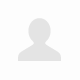
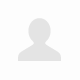

In [330]:
comment_page_soup.prettify

## 다음 페이지 이동

In [307]:
page_buttons[-2].click()

'다음\n페이지 목록으로 이동하기'

## 함수화

## 수집한 데이터 확인

In [194]:
print('작성일 리스트 길이 : ', len(date_list))
print('고유번호 리스트 길이 : ', len(rare_number_list))
print('답글구분 리스트 길이 : ', len(check_reply_list))
print('닉네임 리스트 길이 : ', len(nickname_list))
print('작성자URL 리스트 길이 : ', len(writer_url_list))
print('공감수 리스트 길이 : ', len(like_num_list))
print('링크수 리스트 길이 : ', len(link_num_list))
print('답글수 리스트 길이 : ', len(reply_num_list))
print('첨부이미지URL 리스트 길이 : ', len(img_list))
print('내용 리스트 길이 : ', len(comment_list))

작성일 리스트 길이 :  50
고유번호 리스트 길이 :  50
답글구분 리스트 길이 :  50
닉네임 리스트 길이 :  50
작성자URL 리스트 길이 :  50
공감수 리스트 길이 :  50
링크수 리스트 길이 :  50
답글수 리스트 길이 :  50
첨부이미지URL 리스트 길이 :  50
내용 리스트 길이 :  50


## df 만들기

In [192]:
dict = {'작성일':date_list, '고유번호':rare_number_list, 
        '답글구분':check_reply_list, '닉네임':nickname_list, 
        '작성자URL':writer_url_list, '공감수':like_num_list, 
        '링크수':link_num_list, '답글수':reply_num_list, 
        '첨부이미지URL':img_list, '내용':comment_list}
df = pd.DataFrame(dict)

In [193]:
df

,작성일,고유번호,답글구분,닉네임,작성자URL,공감수,링크수,답글수,첨부이미지URL,내용
0,2022-02-25 오후 12:58:42,750627914109682094,NaN,문득,문득,0,0,0,NaN,*정답: 3번 @해피쏭
1,2022-02-25 오후 12:59:29,750627965884170523,NaN,푸른하늘현,푸른하늘현,0,1,0,NaN,정답 : 3번 https://blog.naver.com/blueday118/2226...
2,2022-02-25 오후 1:05:52,750628376070324774,NaN,란,란,0,1,0,NaN,*정답: 3번 https://blog.naver.com/cdism @란 @cdism
3,2022-02-25 오후 1:07:04,750628453866274870,NaN,saypark3824,saypark3824,0,0,0,https://g-cbox.pstatic.net/MjAyMjAyMjVfNTkg/MD...,정답 : 3번 입니다 @최준원 학생기자
4,2022-02-25 오후 1:07:35,750628486162415983,NaN,리체,리체,0,0,0,NaN,3번~~~^^
5,2022-02-25 오후 1:08:43,750628559529181617,NaN,설향맘,설향맘,0,1,0,https://g-cbox.pstatic.net/MjAyMjAyMjVfMjc2/MD...,🔅 정답 : 3번 https://m.blog.naver.com/hyss9744/22...
6,2022-02-25 오후 1:09:04,750628581574443036,NaN,투르크,투르크,0,0,0,NaN,정답 3번 @soolheart @대박이유
7,2022-02-25 오후 1:09:16,750628594727780502,NaN,kawaii,kawaii,0,0,0,NaN,정답 3번 @청춘
8,2022-02-25 오후 1:11:36,750628745152299355,NaN,UD,UD,0,0,0,NaN,정답 : 3번
9,2022-02-25 오후 1:14:13,750628913226449023,NaN,치즈닭강정,치즈닭강정,0,0,0,NaN,정답 3번 @jjyysun @라일락홀릭 @뚱커벨
